#Изучим общую информацию <a id="Изучим общую информацию"></a>

#### Экспорт библиотек и данных <a id="Экспорт библиотек и данных"></a>

In [17]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    
    df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/real_estate_data.csv', sep='\t') 

except:
    
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t') 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   



Всего в таблице 22 столбца которые умещают 23 698 единиц недвижимости.

Разберём, какие в базе столбцы и какую информацию они содержат:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах(м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении;


Тип данных у каждого столбца:
- С вещественными данными: площадь квартиры в квадратных метрах (м²), расстояние до ближайшего водоёма (м), число водоёмов в радиусе 3 км, расстояние до ближайшего парка (м), число парков в радиусе 3 км, жилая площадь в квадратных метрах(м²), цена на момент снятия с публикации, площадь кухни в квадратных метрах (м²), всего этажей в доме, сколько дней было размещено объявление (от публикации до снятия), расстояние до центра города (м), высота потолков (м), число балконов, расстояние до ближайшего аэропорта в метрах (м);  
- Строковые значения (описание): название населённого пункта, дата публикации  ; 
- Числовые: число фотографий квартиры в объявлении, число комнат, этаж;
- Логическое значение: квартира-студия, свободная планировка, апартаменты.

Количество значений во всех столбцах, кроме total_images, last_price, total_area, first_day_exposition rooms, floor, studio,open_plan - различается. Это говорит о том, что в данных есть пропуски. 

#### Сформируем сводную таблицу где наглядно посмотрим на количество пропусков  <a id="Пропуски"></a>

In [18]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([total, percent], axis = 1, keys = ['Количество пропусков', 'Доля в %'])
missing_df['Тип данных признака'] = df.dtypes
display (missing_df)

,Количество пропусков,Доля в %,Тип данных признака
is_apartment,20924,0.882906,object
parks_nearest,15620,0.659100,float64
ponds_nearest,14589,0.615596,float64
balcony,11519,0.486054,float64
ceiling_height,9195,0.387991,float64
airports_nearest,5542,0.233850,float64
cityCenters_nearest,5519,0.232879,float64
parks_around3000,5518,0.232837,float64
ponds_around3000,5518,0.232837,float64
days_exposition,3181,0.134225,float64


Посмотрим на часть датафрейма 

In [19]:

display(df.sample(20)) 


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9548,18,8700000.0,76.0,2018-07-26T00:00:00,3,3.20,5.0,45.0,3,NaN,False,False,12.0,1.0,Санкт-Петербург,27426.0,6905.0,0.0,NaN,3.0,562.0,54.0
22854,13,5200000.0,51.0,2019-04-02T00:00:00,2,2.50,5.0,31.0,3,NaN,False,False,6.5,NaN,Санкт-Петербург,13940.0,12386.0,0.0,NaN,1.0,804.0,NaN
12386,6,4950000.0,56.6,2017-08-21T00:00:00,3,NaN,9.0,36.7,4,NaN,False,False,8.7,1.0,Сестрорецк,61026.0,36245.0,0.0,NaN,2.0,136.0,485.0
10041,5,5700000.0,52.0,2017-04-11T00:00:00,2,NaN,17.0,NaN,17,NaN,False,False,NaN,0.0,Санкт-Петербург,37474.0,12996.0,1.0,583.0,2.0,824.0,196.0
23152,10,2699000.0,33.5,2017-04-06T00:00:00,1,2.50,5.0,18.5,4,NaN,False,False,5.7,0.0,Отрадное,NaN,NaN,NaN,NaN,NaN,NaN,55.0
20529,20,11990000.0,90.6,2017-11-17T00:00:00,3,NaN,10.0,46.9,6,NaN,False,False,12.2,NaN,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,106.0
17366,10,4090000.0,42.0,2018-11-15T00:00:00,1,2.65,16.0,20.0,13,NaN,False,False,10.0,NaN,Санкт-Петербург,36139.0,13053.0,0.0,NaN,0.0,NaN,26.0
19712,16,9960000.0,78.0,2018-04-25T00:00:00,2,2.50,11.0,40.0,3,NaN,False,False,12.0,1.0,Санкт-Петербург,36520.0,12041.0,1.0,718.0,0.0,NaN,174.0
17630,8,31490000.0,150.0,2017-11-21T00:00:00,4,2.80,12.0,74.0,4,NaN,False,False,18.0,4.0,Санкт-Петербург,39946.0,10720.0,1.0,2102.0,3.0,303.0,25.0
18882,19,11990000.0,146.0,2019-02-27T00:00:00,4,NaN,6.0,77.6,5,NaN,False,False,27.2,NaN,Санкт-Петербург,25761.0,5671.0,2.0,375.0,1.0,479.0,NaN


Посмотрим на статистику по столбцам

In [20]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


По ключевым столбцам std зашкаливает не говоря уже о максимальных значениях (напр. цена, комнаты, высота потолков, количество этажей, 5 балконов)

#### Посмотрим на текущий коэффициент корреляции <a id="Корреляция"></a>

In [21]:

df.corr(method='pearson')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.013583,-0.004204,-0.010077,0.010612,0.008455,-0.003328,-0.024112


#### Вывод <a id="Вывод1"></a>





Есть часть пропуcков, которые мы пока не знаем чем именно наполнить, на данном этапе (значения могли быть не заполнены пользователем сервиса и от этого полностью для нас недоступны).

1) is_apartment, balcony, days_exposition,parks_nearest, ponds_nearest, airports_nearest,  cityCenters_nearest, parks_around3000, ponds_around3000
- возможно на этапе предобработки или анализа мы сможем найти пропущенные значения в этих столбцах, а пока, будем считать, что часть значений не была занесена пользователем либо не получены автоматически.

2)  studio, open_plan и locality_name	
- приведём к нужному типу и уберём пропуски в названии городов.

3)  floors_total
- в числовой тип, пропуски заполним через группировку.

4) ceiling_height, kitchen_area, living_area, last_price, total_area	
- в числовой тип, пропуски заполним через медианные значения группировки.

5) first_day_exposition
- надо разделить по разным столбцам время/день/месяц/год, так мы сможем сгруппировать квартиры по периодам для дальнейшего анализа.

Пока значения NaN нам мешают, особенно в столбцах с основными значениями, но уже сейчас видна устойчивая корреляция столбцов с площадью (комнат, общей, жилой, кухни) и ценой. В дальнейшем это послужит нам основой для выведения факторов, влияющих на цену квартиры.Уберём пропущенные значения за счёт группировок. По остальным столбцам, где пропущенно больше половины значений и корреляция не очевидна (аппартаменты, парки, пруды, балконы и тд.), будем смотреть далее и попробуем использовать имеющиеся данные в них либо откажемся от этого. 

Нужно отметить большие разбежки стандартного отклонения и других статистических значений (min/max)

Проблематика:
- аномальные отклонения значений цены, площади, количества этажей и других столбцах
- отсутствие значений в столбцах
- превалирует типы данных float
- дата не разделена


# Предобработка данных <a id="Предобработка данных"></a>

Начнём с балконов и аппартаментов. Можно скзать, что там где Nan в этих столбцах должен быть ноль. То есть это не аппартаменты и без балконов. 

Вероятно пользователи при подаче объявления пропустили эти поля так как люди, которые понимаю, что продают аппартаменты, полюбому их укажут, так же и с балконом. Конечно, это работает не для 100% пропусков, но мы будем исходить из того, что уберём таким образом огромную часть пропусков и станет полегче с дальнейшей обработкой.

In [22]:

print('Количество NaN в столбце is_apartment:', df['is_apartment'].isnull().sum())
print('Количество NaN в столбце balcony:', df['balcony'].isnull().sum())

Количество NaN в столбце is_apartment: 20924
Количество NaN в столбце balcony: 11519


In [23]:
df['balcony'] = df['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', df['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


In [24]:
df['is_apartment'] = df['is_apartment'].fillna(0)
print('Количество NaN в столбце is_apartment:', df['is_apartment'].isnull().sum())

Количество NaN в столбце is_apartment: 0


#### Приведём в числовой тип столбец с ценой и посмотрим на распределение <a id="Цена"></a>

In [25]:
df['last_price'] = df['last_price'].astype('int').abs()  

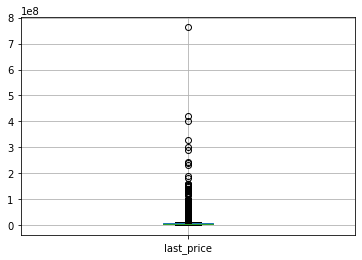

In [26]:
df.boxplot(column="last_price")

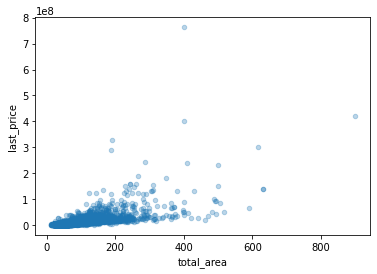

In [27]:

df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3) 

Распределение цены незначительно сдвинуто вправо.Так же видим нереальные цифры по соотношению стоимости и площади. Не стоит забывать о факторах, которые не указаны в таблице, то есть это могут быть вип-аппартаменты с шикарным ремонтом и тд. их не много, они будут не правдоподобны если другие характеристики не соответствуют цене. Так как была доказана связь между ценой и площадью, на этапе рассмотрения, попробуем поиграться с ценой за кв метр и посмотреть на другие характеристики в дальнейшем.

#### Сгруппируем по цене и добавим новый столбец <a id="Цена"></a>

In [28]:
df['price_group'] = pd.cut(df['last_price'],[0,100000,3400000,4650000,6800000,15000000,300000000, np.inf])
df.groupby('price_group')['last_price'].agg(['count','mean','median'])

,count,mean,median
price_group,,,
"(0.0, 100000.0]",1,1.219000e+04,12190
"(100000.0, 3400000.0]",5926,2.518192e+06,2700000
"(3400000.0, 4650000.0]",6035,4.024645e+06,4000000
"(4650000.0, 6800000.0]",5921,5.586156e+06,5500000
"(6800000.0, 15000000.0]",4612,9.501637e+06,8900000
"(15000000.0, 300000000.0]",1200,3.083761e+07,22078550
"(300000000.0, inf]",4,4.785750e+08,410650000


#### Столбец площади переведём в числовой тип <a id="Цена"></a>

In [29]:
df['total_area'] = df['total_area'].astype('int').abs()  

#### Столбцы планнировки и студии <a id="Цена"></a>


In [30]:

df["studio"] = df["studio"].astype(int)
df["open_plan"] = df["open_plan"].astype(int)
#df['studio'].unique()

#### Заменим пропущенные значения в количестве этажей и переведём в числовой тип, так же удалим пропущенные значения в столбце названия локации.

Корреляции с этажом квартиры этого достаточно, все эти квартиры условно на последнем этаже окажутся, тем более что процент заменяемых - не большой 

In [31]:
df['floors_total'] =df.apply(lambda row: row['floor'] if pd.isnull(row['floors_total']) else row['floors_total'], axis=1)
df["floors_total"].isna().sum()
df['floors_total'] = df['floors_total'].astype('int').abs()  

In [32]:
df.dropna(subset = ['locality_name'], inplace = True)


#### Добавим новые столбцы с днём недели, месяцем и годом. <a id="Цена"></a>

In [33]:
df["mounth_exposition"] = pd.to_datetime(df["first_day_exposition"], format='%Y-%m-%dT%H:%M:%S').apply(lambda x: x.strftime('%m'))
df["year_exposition"] = pd.to_datetime(df["first_day_exposition"], format='%Y-%m-%dT%H:%M:%S').apply(lambda x: x.strftime('%Y'))

In [34]:
df['day_exposition'] = pd.to_datetime(df["first_day_exposition"], format='%Y-%m-%dT%H:%M:%S').apply(lambda x: x.isoweekday())
week = {1: '1 - понедельник', 2: '2 - вторник', 3: '3 - среда', 4: '4 - четверг', 
                    5: '5 - пятница', 6: '6 - суббота', 7: '7 - воскресенье'}
                    
df['day_exposition'] = df['day_exposition'].map(week)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_group,mounth_exposition,year_exposition,day_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16,51.0,8,0,0,0,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,"(6800000.0, 15000000.0]",03,2019,4 - четверг
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11,18.6,1,0,0,0,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,"(100000.0, 3400000.0]",12,2018,2 - вторник
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5,34.3,4,0,0,0,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,"(4650000.0, 6800000.0]",08,2015,4 - четверг
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,0,0,0,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,"(15000000.0, 300000000.0]",07,2015,5 - пятница
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14,32.0,13,0,0,0,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,"(6800000.0, 15000000.0]",06,2018,2 - вторник
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21T00:00:00,3,3.70,5,73.3,3,0,0,0,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,"(6800000.0, 15000000.0]",03,2017,2 - вторник
23695,14,3100000,59,2018-01-15T00:00:00,3,NaN,5,38.0,4,0,0,0,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,"(100000.0, 3400000.0]",01,2018,1 - понедельник
23696,18,2500000,56,2018-02-11T00:00:00,2,NaN,3,29.7,1,0,0,0,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(100000.0, 3400000.0]",02,2018,7 - воскресенье
23697,13,11475000,76,2017-03-28T00:00:00,2,3.00,17,NaN,12,0,0,0,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,"(6800000.0, 15000000.0]",03,2017,2 - вторник


In [35]:

print('Количество NaN по locality_name:', df['locality_name'].isnull().sum())
df[(df['locality_name'].isnull())][['locality_name', 'cityCenters_nearest']].head()

Количество NaN по locality_name: 0


,locality_name,cityCenters_nearest


#### Разделим на группы расстояние до центра города. Дополнительно категоризируем с помощью функции, чтобы проще было анализировать. Значения выбраны при поддержке линейки на Яндекс.Картах

In [36]:
def round_group(row):
    if row['cityCenters_nearest'] < 2500:
        return 'Вижу Исаакиевский'
    elif row['cityCenters_nearest'] < 5000:
        return 'В спальных районах'
    elif row['cityCenters_nearest'] < 17000:
        return 'Парнас в 10 минутах ходьбы'
    elif row['cityCenters_nearest'] >= 17000:
        return 'В Колпино тоже норм'

In [37]:
df['center_group'] = df.apply(round_group, axis=1)
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_group,mounth_exposition,year_exposition,day_exposition,center_group
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16,51.0,8,0,0,0,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,"(6800000.0, 15000000.0]",03,2019,4 - четверг,Парнас в 10 минутах ходьбы
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11,18.6,1,0,0,0,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,"(100000.0, 3400000.0]",12,2018,2 - вторник,В Колпино тоже норм
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5,34.3,4,0,0,0,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,"(4650000.0, 6800000.0]",08,2015,4 - четверг,Парнас в 10 минутах ходьбы
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,0,0,0,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,"(15000000.0, 300000000.0]",07,2015,5 - пятница,Парнас в 10 минутах ходьбы
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14,32.0,13,0,0,0,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,"(6800000.0, 15000000.0]",06,2018,2 - вторник,Парнас в 10 минутах ходьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21T00:00:00,3,3.70,5,73.3,3,0,0,0,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,"(6800000.0, 15000000.0]",03,2017,2 - вторник,В спальных районах
23695,14,3100000,59,2018-01-15T00:00:00,3,NaN,5,38.0,4,0,0,0,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,"(100000.0, 3400000.0]",01,2018,1 - понедельник,None
23696,18,2500000,56,2018-02-11T00:00:00,2,NaN,3,29.7,1,0,0,0,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(100000.0, 3400000.0]",02,2018,7 - воскресенье,None
23697,13,11475000,76,2017-03-28T00:00:00,2,3.00,17,NaN,12,0,0,0,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,"(6800000.0, 15000000.0]",03,2017,2 - вторник,Парнас в 10 минутах ходьбы


#### Посмотрим на распределение площади квартиры <a id="Цена"></a>

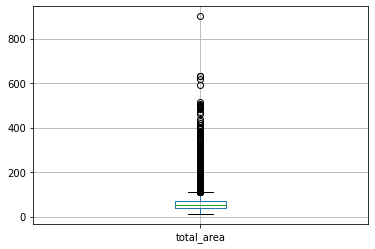

In [38]:
df.boxplot(column="total_area")

In [39]:
df["total_area"].describe()

count    23650.000000
mean        60.100930
std         35.673519
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

Распределение площади имеет тоже небольшой хвост что в целом нормально. Если в городе дворцов есть большие дома, то это скорее традиционный факт, чем аномалия. Но приглядимся к этому внимательнее далее.

#### Сгруппируем по площади и добавим новый столбец <a id="Цена"></a>

In [40]:
df['area_group'] = pd.cut(df['total_area'],[0,20,52,70,120,600,np.inf])
df.groupby('area_group')['total_area'].agg(['count','mean','median'])

,count,mean,median
area_group,,,
"(0.0, 20.0]",43,17.744186,18
"(20.0, 52.0]",12062,39.716879,40
"(52.0, 70.0]",5922,60.505404,60
"(70.0, 120.0]",4574,86.749672,83
"(120.0, 600.0]",1045,175.763636,153
"(600.0, inf]",4,695.000000,631


#### Посмотрим на общее количество этажей <a id="Цена"></a>

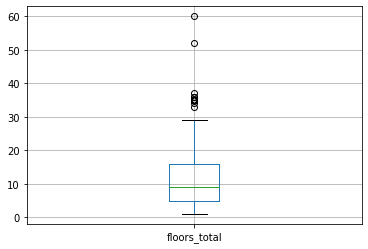

In [41]:
df.boxplot(column="floors_total")

#### Удалим нереальные этажи. До 40 этажей в Питере и области для жилых – это максимум по версии навигационных карт

In [42]:
df = df.drop(df[df["floors_total"] > 40].index)

In [43]:
df['floors_total'].describe()

count    23648.000000
mean        10.669951
std          6.580440
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

#### Сгруппируем этажность <a id="Цена"></a>

In [44]:
df['floors_group'] = pd.cut(df['floors_total'],[0,4,10,20,30,np.inf])
df.groupby('floors_group')['floors_total'].agg(['count','mean','median'])

,count,mean,median
floors_group,,,
"(0.0, 4.0]",2284,3.334063,4
"(4.0, 10.0]",12627,6.918904,6
"(10.0, 20.0]",6059,15.224459,16
"(20.0, 30.0]",2648,24.186556,25
"(30.0, inf]",30,35.066667,35


#### Посмотрим на сводную по высоте <a id="Цена"></a>

In [45]:
df.pivot_table(index='floors_group', columns='area_group', values='ceiling_height', aggfunc='mean')

area_group,"(0.0, 20.0]","(20.0, 52.0]","(52.0, 70.0]","(70.0, 120.0]","(120.0, 600.0]","(600.0, inf]"
floors_group,,,,,,
"(0.0, 4.0]",2.676667,2.795379,2.917774,3.227284,3.213540,3.9
"(4.0, 10.0]",2.857692,2.668676,2.706561,2.915855,3.277387,3.4
"(10.0, 20.0]",2.800000,2.680400,2.724090,2.759844,2.901319,NaN
"(20.0, 30.0]",2.710000,2.780185,2.736734,2.766230,2.839474,2.8
"(30.0, inf]",NaN,2.530000,2.700000,10.833333,NaN,NaN


После 30 этажа есть что-то в потолках, что портит среднее. Это точно выброс и нам ничего не остаётся как подсократить высоту.

#### Посмотрим на статистику столбца с высотой <a id="Цена"></a>


In [46]:
df["ceiling_height"].describe()

count    14488.000000
mean         2.771288
std          1.261680
min          1.000000
25%          2.517500
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

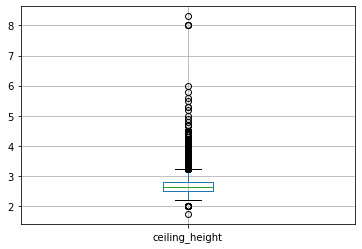

In [47]:
df = df.drop(df[df["ceiling_height"] > 10].index)
df = df.drop(df[df["ceiling_height"] < 1.7].index)
df.boxplot(column="ceiling_height")

Люди живут преимущественно не на высоких маяках, но есть дворцовые палаты и квартиры с низким потолком. Хорошо, что убрали лишнее

#### Заменим NAN высоты потолков на медианные значения по группам <a id="Цена"></a>

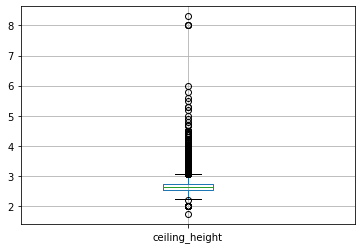

In [48]:
df["ceiling_height"] = df.groupby(['price_group','floors_group','area_group'])['ceiling_height'].transform(lambda x: x.fillna(x.median()))
df["ceiling_height"].fillna(value=df["ceiling_height"].median(), inplace=True)

df["ceiling_height"].isna().sum()
df.boxplot(column="ceiling_height")

#### Чтобы заменить пропуски жилой площади и кухни, посчитаем сперва коэффициенты(соотношение общей площади к жилой и кухне, добавим в отдельный столбец)

In [49]:
df['ratio_total_to_living'] = df["living_area"]/df["total_area"]
df['ratio_total_to_kitch'] = df["kitchen_area"]/df["total_area"]


#### Переведём жилую площадь в числовой тип и заменим пропуски на площадь, выведенную через среднее значение коэффициента умноженного на общую площадь квартиры <a id="Цена"></a>

In [50]:
df["ratio_total_to_living"] = df.groupby(['area_group',"price_group","total_area"])['ratio_total_to_living'].transform(lambda x: x.fillna(x.mean()))
liv_k = df.groupby('area_group')['ratio_total_to_living'].transform(lambda x: x.mean())
df["living_area"].fillna(liv_k*df['total_area'], inplace=True)
df['living_area'] = df['living_area'].astype('int').abs()  
df["living_area"].isna().sum()

0

#### Заменим таким же образом пропуски в площади кухни и приведём в числовой тип <a id="Цена"></a>

In [51]:
df["ratio_total_to_kitch"] = df.groupby(['area_group',"price_group","total_area"])['ratio_total_to_kitch'].transform(lambda x: x.fillna(x.mean()))
kit_k = df.groupby('area_group')['ratio_total_to_kitch'].transform(lambda x: x.mean())
df["kitchen_area"].fillna(kit_k*df['total_area'], inplace=True)
df['kitchen_area'] = df['kitchen_area'].astype('int').abs()  
df["kitchen_area"].isna().sum()

0

#### Посмотрим внимательнее на города <a id="Цена"></a>

In [52]:
len(df['locality_name'].unique())

363

Заменим букву "ё" на "е" чтобы избежать дублей в названии

In [53]:

df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)
df['locality_name'].unique()
len(df['locality_name'].unique())

329

#### Посмотрим на срок действия объявления <a id="Цена"></a>

In [54]:

df.query('days_exposition != days_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_group,mounth_exposition,year_exposition,day_exposition,center_group,area_group,floors_group,ratio_total_to_living,ratio_total_to_kitch
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16,51,8,0,0,0,25,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,"(6800000.0, 15000000.0]",03,2019,4 - четверг,Парнас в 10 минутах ходьбы,"(70.0, 120.0]","(10.0, 20.0]",0.472222,0.231481
7,5,7915000,71,2019-04-18T00:00:00,2,2.76,24,41,22,0,0,0,18,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,"(6800000.0, 15000000.0]",04,2019,4 - четверг,Парнас в 10 минутах ходьбы,"(70.0, 120.0]","(20.0, 30.0]",0.577167,0.266197
44,13,5350000,40,2018-11-18T00:00:00,1,2.75,22,21,3,0,0,0,8,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,"(4650000.0, 6800000.0]",11,2018,7 - воскресенье,Парнас в 10 минутах ходьбы,"(20.0, 52.0]","(20.0, 30.0]",0.469252,0.264301
45,17,5200000,50,2018-12-02T00:00:00,2,2.65,9,30,7,0,0,0,7,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,"(4650000.0, 6800000.0]",12,2018,7 - воскресенье,Парнас в 10 минутах ходьбы,"(20.0, 52.0]","(4.0, 10.0]",0.606000,0.140000
46,17,6600000,52,2019-01-31T00:00:00,2,2.60,24,29,9,0,0,0,8,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,"(4650000.0, 6800000.0]",01,2019,4 - четверг,Парнас в 10 минутах ходьбы,"(20.0, 52.0]","(20.0, 30.0]",0.571154,0.159615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000,145,2018-11-02T00:00:00,4,3.00,26,71,17,0,0,0,15,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN,"(15000000.0, 300000000.0]",11,2018,5 - пятница,Парнас в 10 минутах ходьбы,"(120.0, 600.0]","(20.0, 30.0]",0.492414,0.107586
23685,15,2490000,31,2019-01-24T00:00:00,1,2.50,5,17,5,0,0,0,5,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN,"(100000.0, 3400000.0]",01,2019,4 - четверг,В Колпино тоже норм,"(20.0, 52.0]","(4.0, 10.0]",0.558065,0.180645
23694,9,9700000,133,2017-03-21T00:00:00,3,3.70,5,73,3,0,0,0,13,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,"(6800000.0, 15000000.0]",03,2017,2 - вторник,В спальных районах,"(120.0, 600.0]","(4.0, 10.0]",0.551128,0.103985
23696,18,2500000,56,2018-02-11T00:00:00,2,2.70,3,29,1,0,0,0,9,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(100000.0, 3400000.0]",02,2018,7 - воскресенье,None,"(52.0, 70.0]","(0.0, 4.0]",0.530357,0.146901


Нет корреляции, остаётся только представить, что эта небольшая часть (13%) пропусков вызвана человеческим фактором (люди просто забыли убрать объявление) либо системным сбоем. Оставляем как есть.

#### Посмотрим на аэропорты водоёмы, парки и центр. Кажется их NAN связаны <a id="Цена"></a>

In [55]:
df.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest and parks_around3000 != parks_around3000 and ponds_around3000 != ponds_around3000').shape[0]

5500

In [56]:
print('airports_nearest:', df['airports_nearest'].isnull().sum())
print('cityCenters_nearest:', df['cityCenters_nearest'].isnull().sum())
print('parks_around3000:', df['parks_around3000'].isnull().sum())
print('ponds_around3000:', df['ponds_around3000'].isnull().sum())

airports_nearest: 5524
cityCenters_nearest: 5501
parks_around3000: 5500
ponds_around3000: 5500


Ну почти все. Это серьёзный пробел. Хотя тоже вероятен человеческий фактор, так как не везде люди ставят локации точно и указывают расстояние, плюс, в этих местах система так же не смогла вычислить расстояние. Конечно можно через имеющиеся показания (не все пропуски связаны) померять и посчитать недостающие данные, но это избыточно и сомнительно по чистоте.

#### Посмотрим в каких городах и успакоимся, слишком огромный разброс <a id="Цена"></a>

In [57]:
#pd.pandas.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df.query('cityCenters_nearest != cityCenters_nearest').pivot_table(index='locality_name', columns='rooms', values='last_price', aggfunc='count')

rooms,0,1,2,3,4,5,6,7
locality_name,,,,,,,,
Бокситогорск,NaN,3.0,9.0,3.0,1.0,NaN,NaN,NaN
Волосово,NaN,12.0,15.0,9.0,NaN,NaN,NaN,NaN
Волхов,NaN,32.0,52.0,22.0,4.0,NaN,NaN,NaN
Всеволожск,6.0,144.0,137.0,100.0,11.0,NaN,NaN,NaN
Выборг,NaN,66.0,93.0,62.0,15.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...
село Путилово,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
село Рождествено,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
село Русско-Высоцкое,NaN,4.0,4.0,1.0,NaN,NaN,NaN,NaN


#### Посмотрим, что сейчас с пропусками <a id="Цена"></a>

In [58]:
df.isnull().sum().sort_values()/df.shape[0]*100

total_images              0.000000
year_exposition           0.000000
day_exposition            0.000000
area_group                0.000000
floors_group              0.000000
locality_name             0.000000
balcony                   0.000000
kitchen_area              0.000000
open_plan                 0.000000
mounth_exposition         0.000000
studio                    0.000000
floor                     0.000000
living_area               0.000000
floors_total              0.000000
ceiling_height            0.000000
rooms                     0.000000
first_day_exposition      0.000000
total_area                0.000000
last_price                0.000000
is_apartment              0.000000
price_group               0.000000
ratio_total_to_living     0.143940
ratio_total_to_kitch      0.194742
days_exposition          13.437196
ponds_around3000         23.284366
parks_around3000         23.284366
center_group             23.288599
cityCenters_nearest      23.288599
airports_nearest    

#### **Вывод** <a id="Вывод2"></a>

Мы разобрались с аномалиями в нужных нам столбцах. В местах с ценой проверили информацию и убедились, что цены реальны, количество этажей и высоту потолков сократили так как не бывает таких высоких.
Заполнили по возможности пропуски за счёт группировки.
Привели важные столбцы к общему типу (int).
Разделили даты. Добавили столбцы с группировкой по удалённости от центра.

#Произведём расчёт дополнительных данных <a id="Произведём расчёт дополнительных данных"></a>

Расчёт цены за кв метр и добавление в новый столбец

In [59]:
df['square_price'] = df["last_price"]/(df["total_area"])
df['square_price'] = df['square_price'].astype('int').abs() 

Добавим классификацию по этажу квартиры (Первый-Последний-Другой)


In [60]:
def floor_category(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    return 'другой'
df['floor_category'] = df.apply(floor_category, axis=1)

### **Вывод** 

Всё получилось. Посмотрим подробнее на группы и покрутим значения при исследовании.

#Исследовательский анализ <a id="Проведём исследовательский анализ данных"></a>

#### Изучим основные столбцы (цена, цена за квадрат, комнаты, потолки, общая площадь, жилая, площадь кухни, срок объявления)

In [61]:
df[[ 'last_price', 'square_price', 'rooms', 'ceiling_height','total_area', 'living_area', 'kitchen_area', 'days_exposition']].describe()

,last_price,square_price,rooms,ceiling_height,total_area,living_area,kitchen_area,days_exposition
count,2.362100e+04,2.362100e+04,23621.000000,23621.000000,23621.000000,23621.000000,23621.000000,20447.000000
mean,6.543306e+06,9.988037e+04,2.070361,2.707315,60.110791,34.338089,10.247746,180.800068
std,1.090249e+07,5.036122e+04,1.078876,0.252413,35.688315,22.435994,5.861332,219.844468
min,1.219000e+04,1.110000e+02,0.000000,1.750000,12.000000,2.000000,1.000000,1.000000
25%,3.400000e+06,7.701700e+04,1.000000,2.540000,40.000000,19.000000,7.000000,45.000000
50%,4.650000e+06,9.545400e+04,2.000000,2.650000,52.000000,30.000000,9.000000,95.000000
75%,6.800000e+06,1.149120e+05,3.000000,2.750000,69.000000,42.000000,11.000000,231.000000
max,7.630000e+08,1.907500e+06,19.000000,8.300000,900.000000,409.000000,112.000000,1580.000000


- цена за квартиру в минимальных и максимальных точках тоже выбивается, хотя среднее в норме. И такие цены тоже реалистичны и объявлений не много, больше похоже на исключение, чем выброс, но для чистоты измерений почистим и это
- цена квадрата более уравновешена, хотя смущает верхний порог, похоже на элитное жильё в центральных районах с видом на собор
- сильное отклонение площади по std и минимальное и максимальное значение напоминает выброс, однако и сейчас на сервисе присутствуют подобные варианты и как мы уже видели ранее на диаграме размаха, их небольшое число только подтверждает реальность объявления
- по количеству комнат всё в порядкке, так как имеют место студии и вероятно коммерческие отели
- высота потолков уже была скорректирована - от 1,75 до 10 метров
- в площади кухни и жилой также смущают верхние границы. На диаграмме размаха будет нагляднее
- среднее по срокам объявления выглядит не так пугающе, как максимальная

#### Построим диаграму размаха и для наглядности исключим из анализа выбивающиеся значения

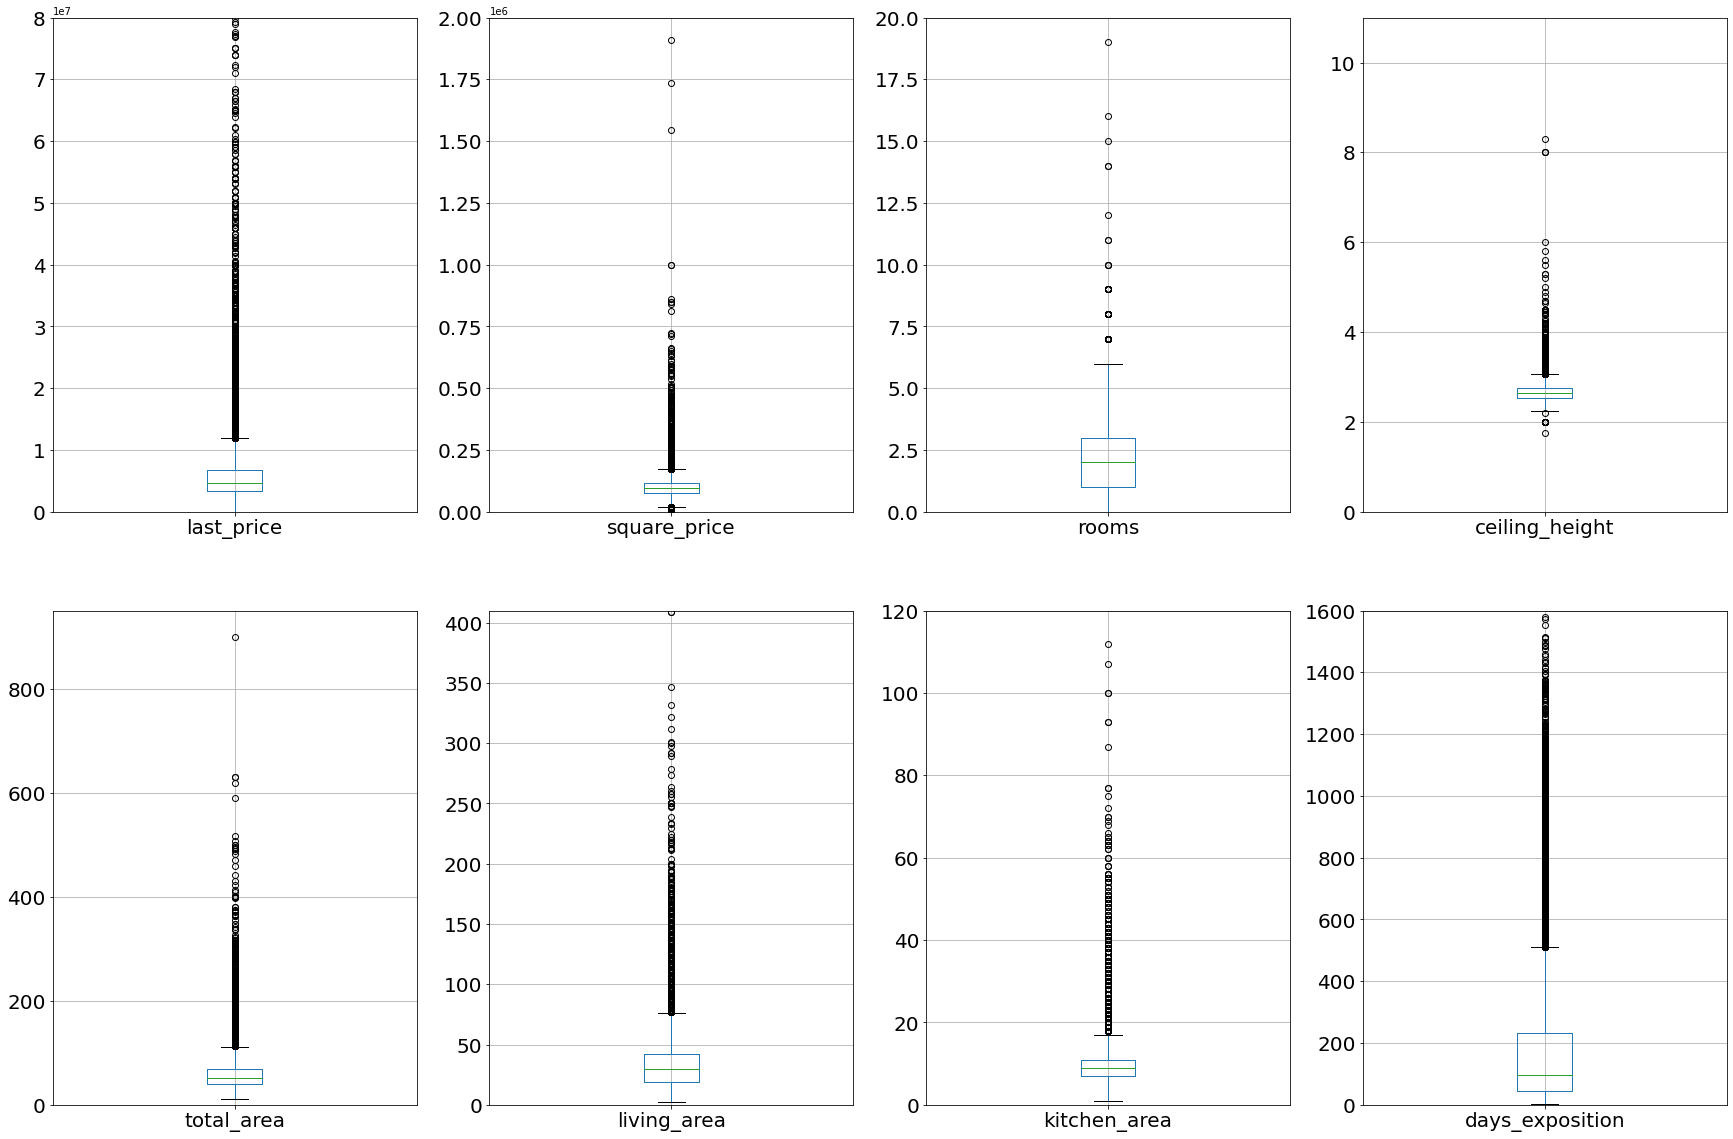

In [62]:
rows = 2
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(30,20))
column_list = ['last_price', 'square_price', 'rooms', 'ceiling_height','total_area', 'living_area', 'kitchen_area', 'days_exposition']
ylims = [80000000, 2000000, 20, 11,  950, 410, 120,1600]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = df.boxplot(column=column_list[count], ax=axes[r,c], fontsize=20)
        ax.set_ylim([0, ylims[count]])
        count += 1

Выбранный диапазон:

- total_area - 25 - 140 метров
- last_price - 1 млн - 20 млн
- rooms - 1 - 6 комнат
- ceiling_height - 2.2 - 3.6 метров
- square_price - 10к - 200к
- living_area - 17 - 100 метров
- kitchen_area - 6 - 22 метров
- days_exposition - 1 до 600 дней


#### Построим гистограмму

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04eeb44a10>,
      dtype=object)

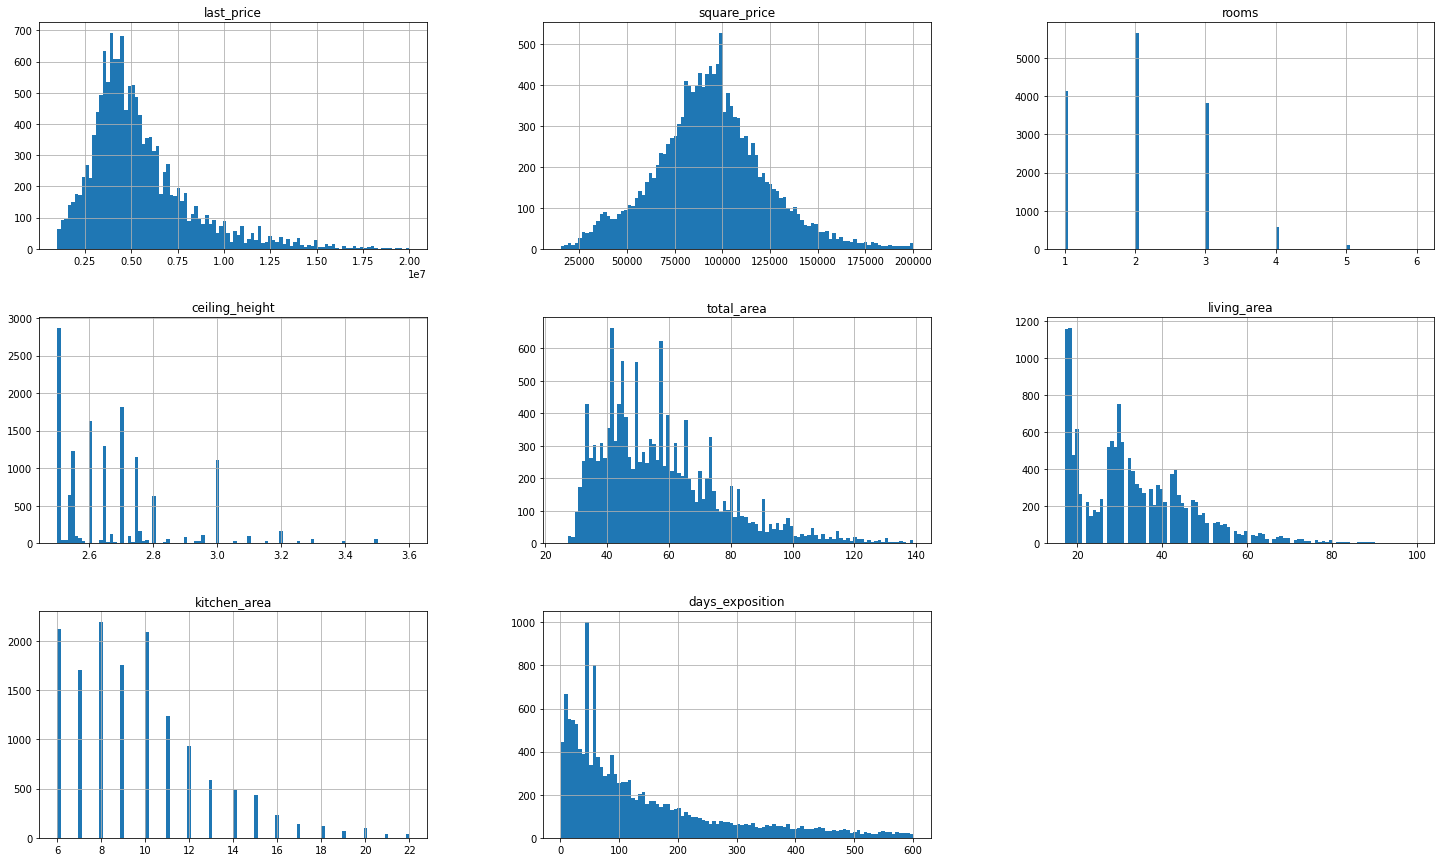

In [63]:

df.query('last_price >= 1000000 and last_price <= 20000000 and square_price >= 15000 and square_price <= 200000 and  rooms >= 1 and rooms <= 6 and ceiling_height >= 2.5 and ceiling_height <= 3.6 and total_area >= 25 and total_area <= 140 and living_area >= 17 and living_area <= 100 and kitchen_area >=6 and kitchen_area <= 22 and days_exposition >= 1 and days_exposition <= 600').hist(column=['last_price', 'square_price', 'rooms', 'ceiling_height','total_area', 'living_area', 'kitchen_area', 'days_exposition'], figsize=(25,15), bins = 100) 

Создадим чистый датафрейм удаляя выбросы из данных столбцов

In [64]:
df_clean = df.query('last_price >= 1000000 and last_price <= 20000000 and square_price >= 15000 and square_price <= 200000 and  rooms >= 1 and rooms <= 6 and ceiling_height >= 2.5 and ceiling_height <= 3.6 and total_area >= 25 and total_area <= 140 and living_area >= 17 and living_area <= 100 and kitchen_area >=6 and kitchen_area <= 22 and days_exposition >= 1 and days_exposition <= 600').copy(deep=True)

Сравним среднее до и после очистки от выбросов

In [65]:
dta = df[['last_price', 'square_price', 'rooms', 'ceiling_height','total_area', 'living_area', 'kitchen_area', 'days_exposition']]
dta2 = df_clean[['last_price', 'square_price', 'rooms', 'ceiling_height','total_area', 'living_area', 'kitchen_area', 'days_exposition']]
last_p = dta.mean()
last_p2 = dta2.mean()
val_table = pd.concat([ last_p,last_p2], axis = 1, keys = ['С выбросами','Без выбросов'])
display(val_table)


,С выбросами,Без выбросов
last_price,6.543306e+06,5.422377e+06
square_price,9.988037e+04,9.365167e+04
rooms,2.070361e+00,2.081039e+00
ceiling_height,2.707315e+00,2.682380e+00
total_area,6.011079e+01,5.757533e+01
living_area,3.433809e+01,3.323976e+01
kitchen_area,1.024775e+01,9.661063e+00
days_exposition,1.808001e+02,1.384041e+02


#### Вывод


- Гистограмма площади: Большая часть квартир имеет метраж от 30 до 65 метров, пик приходится на 40-50 метрах.
- Гистограмма цены: большая часть квартир продается за цену в промежутке между 2 и 6 млн
- Гистограмма комнат: 3/4 квартир имеют 1 - 3 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4. Есть и квартиры, имеющие больше комнат, но их процент сильно ниже
- Гистограмма высоты потолков: квартиры, в большинстве своем, имеют потолки от 2,5-2,8м (самый популярный вариант), есть отдельная стрела на 3 метрах (сталинки, это вы?). Остальные случаи - эксклюзивы
- Время объявления: сократилось после чистки более чем на 40 дней, избавились от аномалий и ситуация преобразилась. Видно, что основная масса продаёт за 4 месяца легко
- Цена за квадрат: после чистки видим подобие нормального распределения. С выбросами был длинный хвост с запредельными ценами. Основная часть лежит в диапазоне от 50к до 125к, пик приходится на 100к
- Кухня и жилая площадь: не сильно изменились в силу того, что основная часть площадей была и до этого сконцентрирована внутри ящика. Не так уж и много элитных квартир с баскетбольной площадкой в зале и летней террасой на кухне. Основная часть жилой находится в пределах 15 - 35 метров (однако наблюдаем просадку в районе 22 - 23 метров, вероятно это последствия среднего коэффициента либо такого жилья действительно не много, по сравнению с маленькими студиями, которые можно быстро строить и продавать). С кухнями похожая ситуация, основная часть лежит в пределах от 6 до 10 метров


In [66]:
# КОД РЕВЬЮВЕРА

dta.describe()

,last_price,square_price,rooms,ceiling_height,total_area,living_area,kitchen_area,days_exposition
count,2.362100e+04,2.362100e+04,23621.000000,23621.000000,23621.000000,23621.000000,23621.000000,20447.000000
mean,6.543306e+06,9.988037e+04,2.070361,2.707315,60.110791,34.338089,10.247746,180.800068
std,1.090249e+07,5.036122e+04,1.078876,0.252413,35.688315,22.435994,5.861332,219.844468
min,1.219000e+04,1.110000e+02,0.000000,1.750000,12.000000,2.000000,1.000000,1.000000
25%,3.400000e+06,7.701700e+04,1.000000,2.540000,40.000000,19.000000,7.000000,45.000000
50%,4.650000e+06,9.545400e+04,2.000000,2.650000,52.000000,30.000000,9.000000,95.000000
75%,6.800000e+06,1.149120e+05,3.000000,2.750000,69.000000,42.000000,11.000000,231.000000
max,7.630000e+08,1.907500e+06,19.000000,8.300000,900.000000,409.000000,112.000000,1580.000000


#### Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Ответим на вопрос: сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [67]:

df_clean['days_exposition'].describe()


count    14277.000000
mean       138.404076
std        136.091234
min          1.000000
25%         43.000000
50%         89.000000
75%        193.000000
max        600.000000
Name: days_exposition, dtype: float64

Видно, что есть продажи которые прошли слишком быстро, за 1 день, так и необычно долго - больше 193 дня. При этом среднее 138 дней, а медиана - 89. Вероятно часть объявлений не была закрыта вовремя.

In [68]:
df_clean['days_group'] = pd.cut(df_clean['days_exposition'],[1,45,95,231,500,np.inf])
df_clean.groupby('days_group')['days_exposition'].agg(['count','mean','median'])

,count,mean,median
days_group,,,
"(1.0, 45.0]",3720,21.600538,21.0
"(45.0, 95.0]",3878,64.864105,60.0
"(95.0, 231.0]",3834,152.177621,146.0
"(231.0, 500.0]",2447,344.498161,336.0
"(500.0, inf]",397,548.264484,549.0


Дополнительно убедились, что большая часть объявлений закрывается до года. А вот про остальные точно кто-то забыл, либо это сложные и непривлекательные проекты, так сказать в пассивном поиске своего покупателя.

In [69]:
import plotly.express as px
fig = px.histogram(df_clean, x="days_exposition", title='Распределение числа объявлений по срокам')
fig.show()

На сводном графике видим нормальное распределение сроков объявлений. Большая часть закрылась в течение 150 дней. Что в целом адекватный срок, учитывая всё разнообразие жилого фонда.

Попробуем отсеять часть аномальных сроков по медиане из группировки (336)

In [70]:
days = df_clean.query('days_exposition<336')['days_exposition']
fig1 = px.histogram(df_clean.query('days_exposition<336'), x="days_exposition", title='Распределение числа объявлений по срокам с фильтрацией хвоста')
fig1.show()


Есть несколько несистемных выбросов, произошедших вероятно в короткий промежуток.В самом начале это может свидетельствовать о массовом закрытии объявлений со стороны пользователей

In [71]:
df_clean.query('40<days_exposition<50')['first_day_exposition'].value_counts().sort_values(ascending=False).head(5)

2018-02-01T00:00:00    37
2018-02-07T00:00:00    13
2017-12-11T00:00:00    12
2017-12-07T00:00:00    12
2018-01-12T00:00:00    10
Name: first_day_exposition, dtype: int64

In [72]:
df_clean['first_day_exposition'].value_counts().sort_values(ascending=False).head(5)

2018-02-01T00:00:00    271
2017-11-10T00:00:00    164
2017-10-13T00:00:00     90
2017-09-27T00:00:00     76
2018-07-10T00:00:00     68
Name: first_day_exposition, dtype: int64

Да, как видим, событие не сильно привязано к дате, значит это может быть связано с пользователями (например они к этому сроку получают уведомление, которое их мотивирует продлить объявление либо закрыть) или система сама закрывает объявления по своему алгоритму не исключено, что это был баг.

Чтобы проверить гиппотезу о самом успешном и провальном времени по закрытию сделки, скопируем в отдельный фрэйм столбцы и дропнем пропуски.

In [73]:
db = df_clean.copy(deep=True)
db.dropna(subset= ['days_exposition'],inplace=True)
db['days_exposition'].isna().sum()

0

Учитывая медиану и среднюю по срокам закрытия объявления, можно выдвинуть гиппотезу, что успешная сделка будет считаться если остальные 75% объявлений закрылись позже. Для нас это число 43, то есть за полтора месяца и меньше, эх, что может быть слаще.

In [74]:

from scipy import stats as st
    
interested_value = 43
df_G = db['days_exposition']   
alpha = .05 # критический уровень статистической значимости
    
results = st.ttest_1samp(
    df_G, 
    interested_value)
    
print('p-значение: ', results.pvalue)
    
if ( results.pvalue / 2 < alpha) and (df_G.mean() < interested_value):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.0
Не получилось отвергнуть нулевую гипотезу


Прекрасно, что и требовалось доказать. 43 - это верхняя граница показателя быстрой продажи. 

Теперь проверим обратное значение, когда 75% объявлений закрываются раньше чем за 193 дня, а те кто позже – это и есть медленные сделки.

In [75]:
from scipy import stats as st
    
interested_value = 193
df_G = db['days_exposition']    
alpha = .05 # критический уровень статистической значимости
    
results = st.ttest_1samp(
    df_G, 
    interested_value)
    
print('p-значение: ', results.pvalue)
    
if ( results.pvalue / 2 < alpha) and (df_G.mean() > interested_value):

    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.0
Не получилось отвергнуть нулевую гипотезу


193 - это не показатель скорости, а скорее непривлекательности объявления.

#### Вывод

Мы узнали, что даже если ты продал квартиру за 43 дня это ещё не значит, что нельзя сделать быстрее. Основная масса объявлений закрывается до 193 дней, что для рынка недвижимости адекватный показатель. Так же интересное наблюдение по выбросам – раз в 50 дней можно запушить пользователям уведомление и продолжать пушить, чтобы это ни было, это вероятно последствия работы алгоритма сервиса.

#### Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года

Для графиков напишем функцию. Так как цена за квадратный метр безусловно коррелирует с ценой (так как фактически берётся из её расчётов), будем смотреть сразу на корреляцию цены за квадратный метр с остальными параметрами

In [76]:
def price_demand(df_clean, column):
    title_dict = {'rooms': 'Зависимость от комнат', 'floor_category': 'Зависимость от этажа',
                  'cityCenters_spb': 'Зависимость от удаленности центра города',
                  'days_exposition':'Медиана по дням', 'mounth_exposition': 'Медиана по месяцам',
                  'year_exposition': 'Медиана по годам','center_group': 'Зависимость от удаленности центра города'}
    if column == 'floor_category' or column == 'center_group':
        sort_key = 'square_price'
    else:
        sort_key = column
    if column == 'center_group':
        fontsize = 12
    else:
        fontsize = 15
    df_filtered = df_clean.groupby(column).median()['square_price'].reset_index().sort_values(by=sort_key)
    plot = df_filtered.plot(x=column, y="square_price", kind='bar', 
                            title=title_dict[column], legend=None, 
                            fontsize=fontsize, figsize=(17,9))
    ax2 = plt.gca() 
    x_axis = ax2.xaxis
    x_axis.label.set_visible(False)
    if column != 'cityCenters_spb':
        plt.xticks(rotation=0)
    return plot

Смотрим зависимость цены от количества комнат

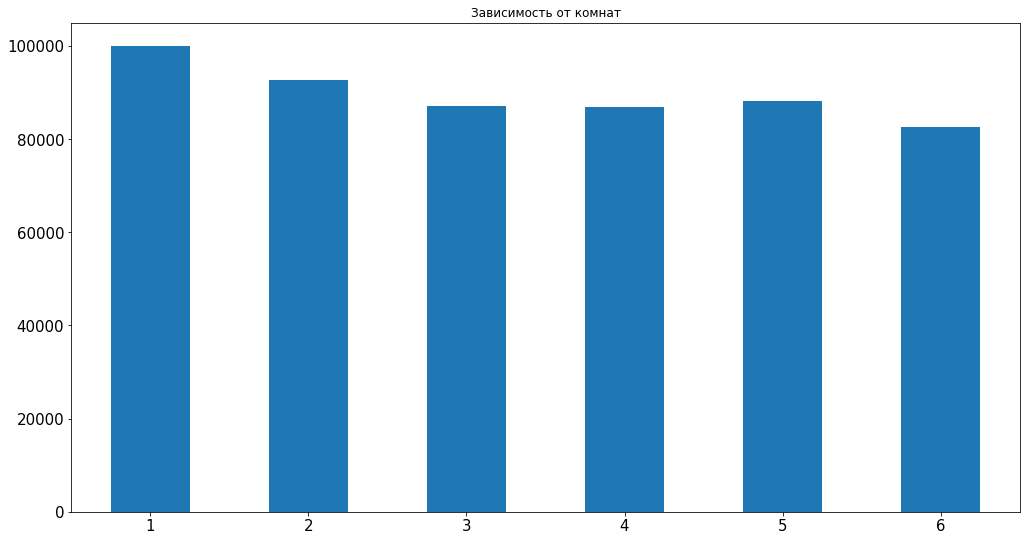

In [77]:
price_demand(df_clean, 'rooms')


Посмотрим на выброс в размахе

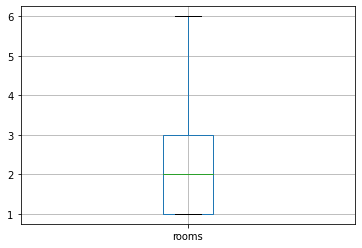

In [78]:
df_clean.boxplot(column='rooms')

Ты видишь зависимость? А она есть. Безусловно, небольшая зависимость цены от количества комнат присутствует и это не новая история. Гораздо интереснее увидеть нелинейную зависимость цены квадратного метра от количества комнат. Не считая выброса на 12-ти комнатной, вот где мини-отели прячутся? А вообще интересно, ведь в студиях и однокомнатных такая же инфраструктура, только поменьше, эхо современного мира и спроса на небольшие квартирки. Но уже начиная с 4 комнатных цена за квадрат снова начинает расти, а на 6 снова начинает падать (видимо из-за небольшой востребованности)

Проверяем зависимость с этажами

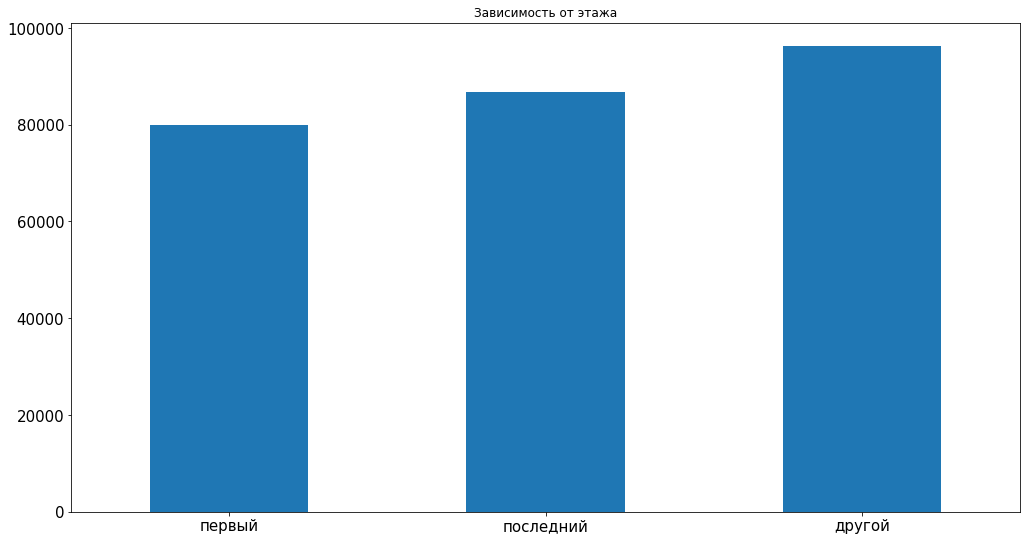

In [79]:
price_demand(df_clean, 'floor_category')

Очевидная зависимость, мало кто хочет жить на первом этаже, конечно на последнем пейзаж хорош, но лучше золотой середины ничего пока нет :)

Зависимость цены за квадрат от расстояния до центра

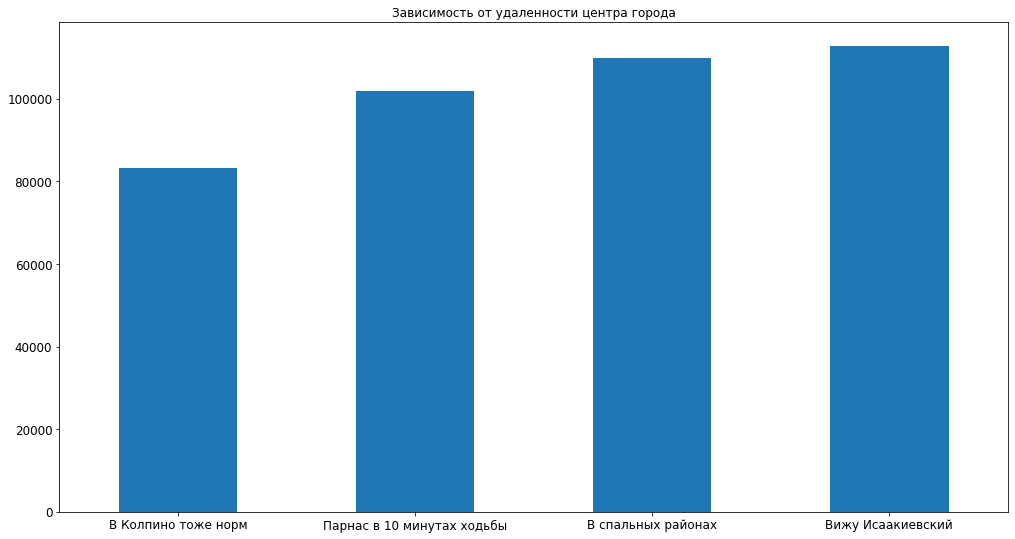

In [80]:
price_demand(df_clean,'center_group')

Не смотря на прекрасные ЖК в пригороде и спальных районах, притяжение центра на столько велико, что цены немного подскакивают

Построим сводный график зависимости общей площади  от общей цены и цены за квадратный метр


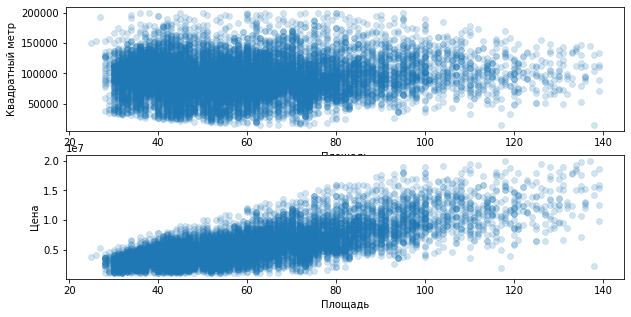

In [81]:

fig, ax = plt.subplots(2, figsize=(10, 5))
ax[0].scatter(x = df_clean['total_area'], y = df_clean['square_price'],linewidths = 0.6, alpha = 0.2)
ax[0].set_xlabel("Площадь")
ax[0].set_ylabel("Квадратный метр")

ax[1].scatter(x = df_clean['total_area'], y = df_clean['last_price'],linewidths = 0.6, alpha = 0.2)
ax[1].set_xlabel("Площадь")
ax[1].set_ylabel("Цена")

plt.show()

Можно увидеть, что цена по всей площади имеет примерно одинаковый диаметр разброса и постепенно растёт вместе с ростом площади. Это говорит о том, что цена достаточно неэластична к динамике на отдельно взятом отрезке площади. Чего нельзя сказать о цене за квадратный метр, так как динамика старается сохранится широкой на всей длине и не уходить вверх а держаться горизонтально, что говорит о слабой зависимости.

Напишем функцию для зависимости цены квадратного метра от времени

In [82]:
def price_to_time(df, ylims=None):
    time_col = ['day_exposition', 'mounth_exposition', 'year_exposition']
    titles = ['Медиана по дням', 'Медиана по месяцу', 'Медиана по году']
    for i in range(len(time_col)):
        plot_data = df_clean.groupby(time_col[i]).median()['square_price'].reset_index().sort_values(by=time_col[i])
        if ylims is None:
            plot = plot_data.plot(x=time_col[i], y="square_price", kind='line', figsize=(14,6),
                                   legend=False, title=titles[i], fontsize=15)
        else:
            plot = plot_data.plot(x=time_col[i], y="square_price", kind='line', figsize=(14,6),
                               legend=False, title=titles[i], fontsize=15, ylim=ylims[i])
        ax2 = plt.gca()
        x_axis = ax2.xaxis
        x_axis.label.set_visible(False)
        if time_col[i] != 'day_exposition':
            plt.xticks(rotation=0)
    return plot

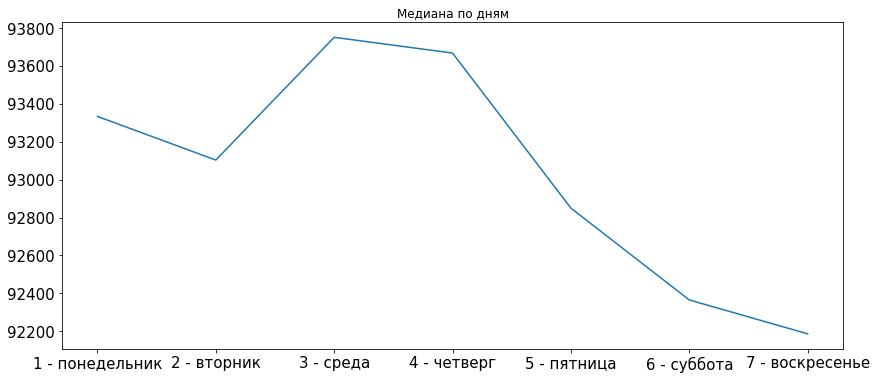

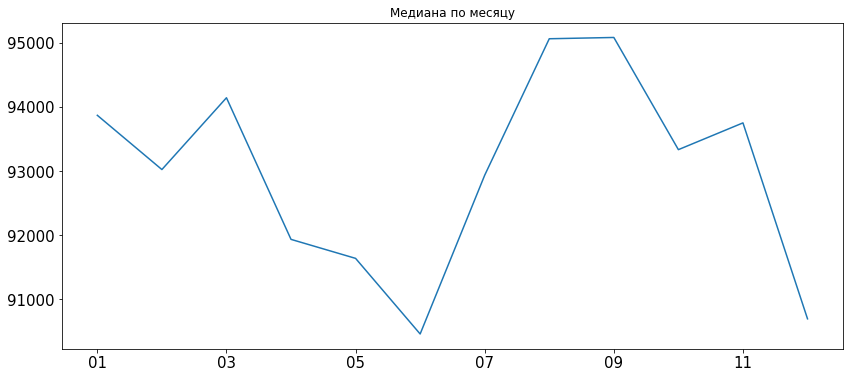

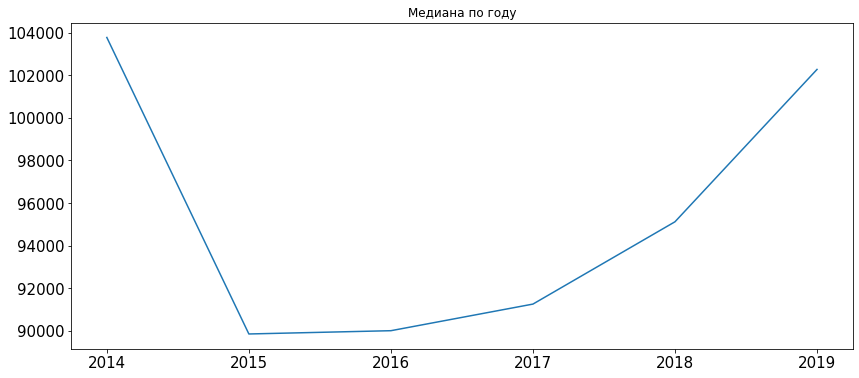

In [83]:
price_to_time(df_clean)

- Зависимость цены квадратного метра от дня недели публикации разделяется на две части. В начале недели с переменным успехом стремится вверх, и начиная с чётверга скатывается к выходным объявление. То есть цена объявлений опубликованых в будний день, чуть выше, чем цена на квартиры с объявлениями, опубликованными в выходные дни

- От месяца публикации видно, что интересным фактором зависимости цены  является сезонность.  Или летние объявления подаются с большей ценой за квадрат, и наоборот, во все остальные месяцы (апрель или январь) цена достаточно низкая. Чем ближе к лету, тем жарче цены

- На графике лет чётко прослеживается тренд. Предположу, что экономико-политические факторы оказали небольшое влияние и цена начала падать до 2016 года с последующим повышением. Немного напоминает курс нефти марки Brent :)

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья

In [84]:
cities = df_clean['locality_name'].value_counts().index.tolist()[:10]
metr = [df_clean[df_clean['locality_name'] == city]['square_price'].median() for city in cities]
flat = [df_clean[df_clean['locality_name'] == city]['last_price'].median() for city in cities]
frame = {'Города': cities, 'Средняя цена за метр': metr, 'Средняя цена за квартиру': flat}
data = pd.DataFrame(frame).sort_values(by='Средняя цена за метр', ascending=False)
data

,Города,Средняя цена за метр,Средняя цена за квартиру
0,Санкт-Петербург,101500.0,5426412.0
6,Пушкин,99641.0,5725000.0
8,деревня Кудрово,89829.5,4500000.0
5,поселок Парголово,85289.0,4700000.0
2,поселок Мурино,80906.0,3977500.0
1,поселок Шушары,73913.0,4200000.0
3,Колпино,73304.0,3799000.0
7,Гатчина,68518.0,3400000.0
4,Всеволожск,65454.0,3630000.0
9,Выборг,56818.0,2950000.0


В северной столице цена за квадратный метр будет самой высокой из всех городов ЛО (101500 за квадрат), чего не скажешь о Выборге, в городе с самой низкой стоимостью (56818 за квадрат) из десяти городов

Для ответа о самых влиятельных факторах приведём таблицу

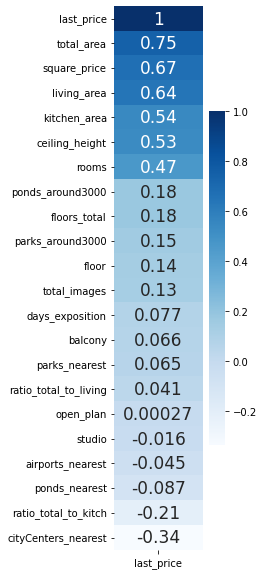

In [85]:
plt.figure(figsize=(2,10))
sns.heatmap(df_clean.corr(method='pearson')[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':17})

#### Вывод

- Зависимость от числа комнат: чем больше комнат, тем больше площадь и цена. Но с точки зрения цены за квадрат – это не всегда так. В объявлениях однокомнатных цена гораздо выше, чем у 3-4 комнатных

- Слабая зависимость цены от этажа квартиры - от самого дешёвого на первом этаже, самого дорого где-то между первым и последним и по середине по цене последний этаж.

- Зависимость от расстояния до центра: чем дальше от центра, тем дешевле квадрат. И наоборот, квадрат тем дороже, чем ближе к центру. С ценой тоже самое

- Время публикации - проявляется косвенная зависимость от политико-экономических факторов и только на годовых интервалах. На месячных - сезонная. На дневных - зависимость от деловых дней.

**Самые яркие факторы:** цена квадратного метра, общая, жилая и кухонная площади, высота потолков и количество комнат.

#### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Выясним, какая область входит в центр. Создайдим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона

In [86]:
spb_flats = df_clean.query('locality_name == "Санкт-Петербург"').copy()
spb_flats.loc[:, 'cityCenters_spb'] = (spb_flats.loc[:, 'cityCenters_nearest']/1000).round()
spb_flats.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_group,mounth_exposition,year_exposition,day_exposition,center_group,area_group,floors_group,ratio_total_to_living,ratio_total_to_kitch,square_price,floor_category,days_group,cityCenters_spb
2,10,5196000,56,2015-08-20T00:00:00,2,2.55,5,34,4,0,0,0,8,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,"(4650000.0, 6800000.0]",08,2015,4 - четверг,Парнас в 10 минутах ходьбы,"(52.0, 70.0]","(4.0, 10.0]",0.612500,0.148214,92785,другой,"(500.0, inf]",14.0
9,18,5400000,61,2017-02-26T00:00:00,3,2.50,9,43,7,0,0,0,6,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,"(4650000.0, 6800000.0]",02,2017,7 - воскресенье,Парнас в 10 минутах ходьбы,"(52.0, 70.0]","(4.0, 10.0]",0.714754,0.106557,88524,другой,"(231.0, 500.0]",15.0
10,5,5050000,39,2017-11-16T00:00:00,1,2.67,12,20,3,0,0,0,8,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,"(4650000.0, 6800000.0]",11,2017,4 - четверг,Парнас в 10 минутах ходьбы,"(20.0, 52.0]","(10.0, 20.0]",0.520513,0.217949,129487,другой,"(95.0, 231.0]",14.0
15,16,4650000,39,2017-11-18T00:00:00,1,2.65,14,20,5,0,0,0,7,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,"(3400000.0, 4650000.0]",11,2017,6 - суббота,Парнас в 10 минутах ходьбы,"(20.0, 52.0]","(10.0, 20.0]",0.525641,0.194872,119230,другой,"(1.0, 45.0]",14.0
16,11,6700000,82,2017-11-23T00:00:00,3,3.05,5,55,1,0,0,0,9,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,"(4650000.0, 6800000.0]",11,2017,4 - четверг,Парнас в 10 минутах ходьбы,"(70.0, 120.0]","(4.0, 10.0]",0.678049,0.109756,81707,первый,"(231.0, 500.0]",11.0



График зависимости цены от километров до центра

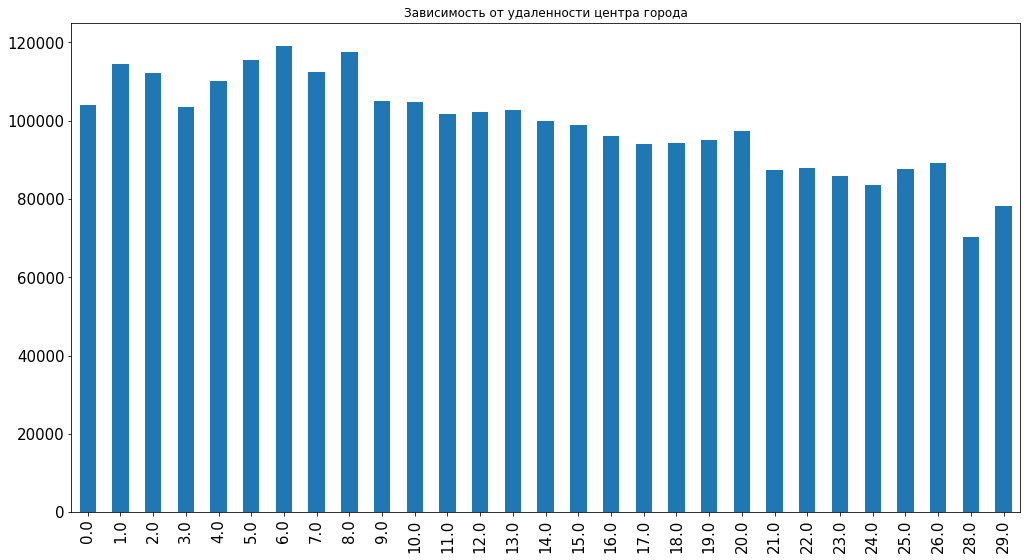

In [87]:
price_demand(spb_flats, 'cityCenters_spb')

#### Вывод 



Падение и рост цены в самом центре происходит несколько раз: на нулевом третьем седьмом и девятом километре. До 8 километра она проявляет здоровую динамику, а вот после уже не возвращается в прежнюю точку и продолжает снижаться. Расстояние достаточно большое для города. Так как мы не трогали название локации, это могли сделать пользователи, отнеся объявление к городу. В этом месте можно рекомендовать протестировать алгоритм для лучшего определения центра, если конечно расстояние выстроено по принципу линейки, а не дорожной карты. Гистограмма цены за квадрат тем не менее закономерно снижается по мере удаления от центра.

#### Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

Для совместного анализа центра СПБ и остальных районов выделим эти сегменты по границе центра

In [88]:
spb_flats['type_center']= spb_flats.loc[spb_flats['cityCenters_nearest'] <= 8000, 'type_center']='сenter'
spb_flats.loc[spb_flats['cityCenters_nearest'] > 8000, 'type_center']='outside_center'

Посмотрим на распределение основных факторов в этих сегментах

In [89]:
columns = ['last_price', 'square_price', 'rooms', 'ceiling_height','total_area', 'living_area', 'kitchen_area', 'days_exposition']

for col in columns:
    
    fig = px.histogram(spb_flats, x = col, marginal = 'box', color = 'type_center', title = 'Распределение '+col, template = 'plotly_dark')
    fig.show()

- Гистограмма площади: большая часть квартир имеет метраж от 50 до 90. Видна разность по числу между отдельными площадами (напр. число квартир в 48 - 49 метров сильно выдаётся)
- Гистограмма цены: центр не на много отличается от остального сегмента, основная часть в промежутке от 4 до 12.5 млн. Большая часть квартир продается за цену в промежутке между 5 и 10 млн. Опять же, есть выбросы, но ничего
- Гистограмма комнат: 2/3 квартир имеют 2 или 3 комнаты, чуть меньший процент имеют 1 и 4 комнатные и небольшое количество - 5. Студий и 6 комнатных практически нет
- Гистограмма высоты потолков: квартиры, в большинстве своем, имеют потолки от з метра (самый популярный вариант). Остальные объявления сконцентрированы в диапазоне от 2 до 2.9 и от 3.1 до 3.6
- Гистограмма сроков объявления: из центра приходится меньшая часть сегмента (как и в других показателях), объявления закрываются позже, по сравнению с остальными районами, сроки сдвинуты (медиана 105, в остальных районах 81)
- Жилая площадь и кухня тоже со сдвигом в большую сторону по метражу в центре(41 жилая и 10 кухня)
- Общая площадь тоже сильно отличаете по медиане в сравнении с другим сектором (41 в центре и 30 в других местах). Так же и с ценой на метр квадратный (116 в центре и в остальныйх местох 100).

То есть квартиры крупные, много комнат, высокие потолки и тд. Но сроки публикации объявлений говорят о том, что:
Эти квартиры дорогие из-за расположения, комфорта и площадей, и пока предпочтение отдаётся квартирам чуть подальше, в спальных районах, где тише и дешевле. По продажам центр уступает.


Проверим зависимость цены в центре и остальных районах от количества комнат

In [90]:
fig = px.line(spb_flats.pivot_table(index = ['type_center', 'rooms'], values = 'last_price', aggfunc = 'mean').reset_index(),
             x = 'rooms', y = 'last_price', color = 'type_center', template = 'plotly_dark')
fig.show()

Очень похоже на зависимость в остальном секторе объявлений. 


Анализ корреляции ффакторов цены за квадрат и общей цены в центре и за пределами

In [91]:
display(spb_flats.pivot_table(index = 'type_center', values = columns, aggfunc = 'corr')[['last_price', 'square_price']])

last_price  square_price
type_center                                             
outside_center last_price         1.000000      0.522364
               square_price       0.522364      1.000000
               rooms              0.492257     -0.287262
               ceiling_height     0.484388      0.341276
               total_area         0.820815     -0.025017
               living_area        0.690075     -0.147332
               kitchen_area       0.599461      0.290656
               days_exposition    0.082042     -0.033460
сenter         last_price         1.000000      0.460483
               square_price       0.460483      1.000000
               rooms              0.457173     -0.370510
               ceiling_height     0.306964     -0.018659
               total_area         0.728287     -0.235773
               living_area        0.625985     -0.291128
               kitchen_area       0.522000      0.140710
               days_exposition    0.115432     -0.015206

Очевидно, что цена в большей зависимости будет за пределами центра от площади, так как любое колебание в меньшую сторону не будет встречать сопротивления цены и она будет снижаться, в центре же есть усиливающие факторы, такие как развитая инфраструктура, развлечения, достапримечательности, престиж. Площад комнаты и кухни незначительно отличаются влиянием на цену в центре. Заметно, что цена квадрата в целом не эластична к данным факторам.


Зависимость цены за квадрат и цены общей от этажа

In [92]:
fig = px.line(spb_flats.pivot_table(index = ['type_center', 'floor_category'], values = 'last_price', aggfunc = 'mean').reset_index(),
             x = 'floor_category', y = 'last_price', color = 'type_center', template = 'plotly_dark')
fig.show()


И тут тоже ничего не изменилось. Устойчивая связь


<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Тренд также сохраняется

</div>


Зависимость цены за квадрат в центре от удаленности от самого центра

In [93]:
fig = px.line(spb_flats.pivot_table(index = ['type_center', 'cityCenters_spb'], values = 'last_price', aggfunc = 'mean').reset_index(),
             x = 'cityCenters_spb', y = 'last_price', color = 'type_center', template = 'plotly_dark')
fig.show()

Повторяет на более мелком масштабе то что мы наблюдали на другой гистограмме: в самом центре цена зашкаливает и постепенно снижается до 3 км и растёт с 4. А после 8 падение.



<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Цена имеет некую отрицательную тенденцию, но она не столь существенна как в основном датафрейме. Вероятно для объектов центра куда важен сам факт расположения в центральной зоне

</div>

Зависимость цены от даты размещения объявления

In [94]:

columns1 = ['day_exposition', 'mounth_exposition', 'year_exposition']

fig = px.line(spb_flats.pivot_table(index = ['type_center', 'day_exposition'], values = 'last_price', aggfunc = 'mean').reset_index(),
             x = 'day_exposition', y = 'last_price', color = 'type_center', template = 'plotly_dark')
fig.show()

In [95]:
fig = px.line(spb_flats.pivot_table(index = ['type_center', 'mounth_exposition'], values = 'last_price', aggfunc = 'mean').reset_index(),
             x = 'mounth_exposition', y = 'last_price', color = 'type_center', template = 'plotly_dark')
fig.show()

In [96]:
fig = px.line(spb_flats.pivot_table(index = ['type_center', 'year_exposition'], values = 'last_price', aggfunc = 'mean').reset_index(),
             x = 'year_exposition', y = 'last_price', color = 'type_center', template = 'plotly_dark')
fig.show()

На годовом интервале наблюдается сильное отличие по цене. Кризис ударил сильнее по бюджетному жилью и с тех пор разница сохраняется, в центре жильё на порядок дороже. 
На дневном и месяцном графике без изменений, кроме разницы в цене объявления.

Корреляция факторов в центре

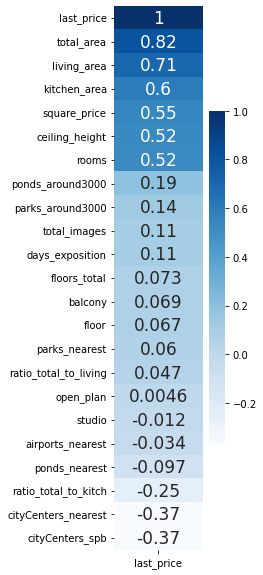

In [97]:
plt.figure(figsize=(2,10))
sns.heatmap(spb_flats.corr(method='pearson')[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':17})

Корреляция факторов очищенного датафрейма

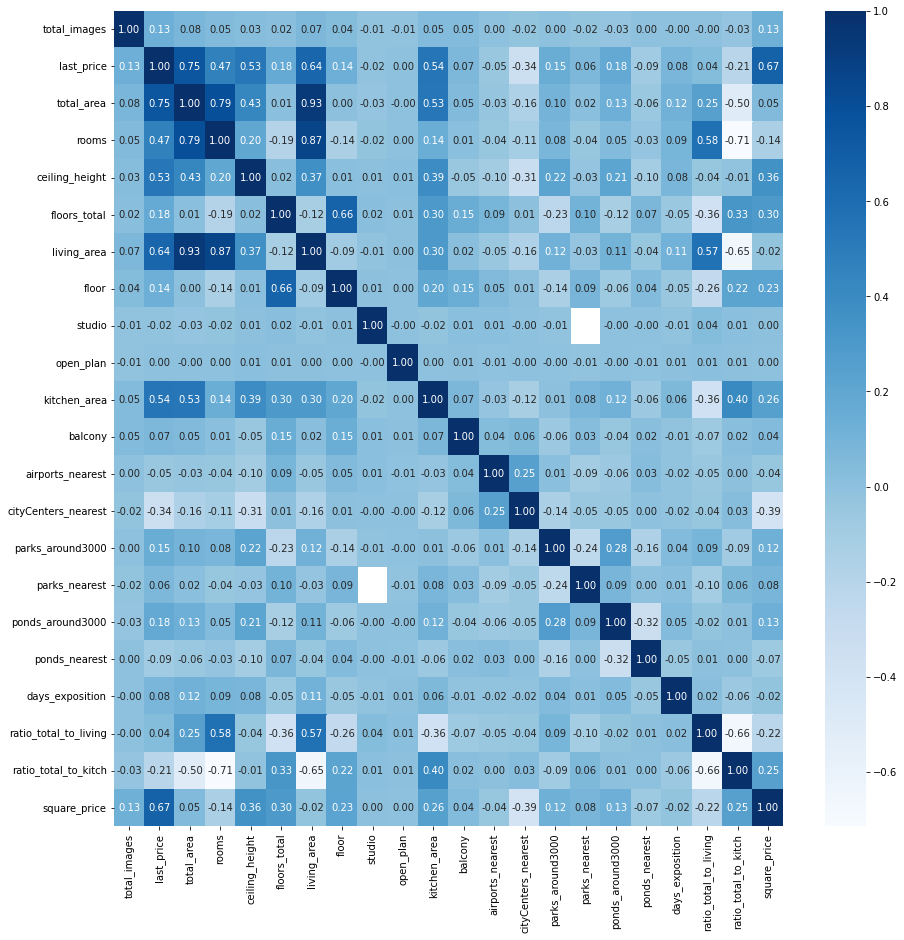

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(df_clean.corr(method='pearson'), annot=True, cmap="Blues", fmt='.2f')

#### Вывод

Отличаются ли выводы по центру от общих выводов?

Отличаются лишь тем, что корреляция усиливается с ростом урбанизации. То есть самые яркие факторы без изменений.

Зависимость от числа комнат - везде одинаковая, динамичная, сильной зависимости нет ни на каком масштабе.

Слабая зависимость цены от этажа квартиры - от самого дешёвого на первом этаже, самого дорого где-то между первым и последним и по середине по цене последний этаж.


Расстояние до центра – в самом центре влияние сказывается, и действительно наблюдается местами рост цены, особенно на нулевом километре, но и тут есть особенности, так как в промежутке от 0 до 8 цена колеблется и не показывает 100% тренда, в это же время отличие общей статистики как раз в чётком увеличении цены в сторону центра.


Время публикации - в центре политико-экономическая а скорее ещё общественная жизнь ощутимее влияют уже на интервалах дня и месяца, заметна динамика, чего не скажешь про общий масштаб. На годовом интервале динамика стала выразительнее. 


Понятно, что можно было взять просто цену квартиры, вместо цены за квадрат, однако на цену много факторов может влиять и это тяжело прогнозируется, а было интересно посмотреть, как себя поведёт по отношению ко всем параметрам цена за квадрат, оказывается не так уж и сильно упала цена, когда нефть упала, например, помимо прочего.



Для примера корреляция цены за квадратный метр

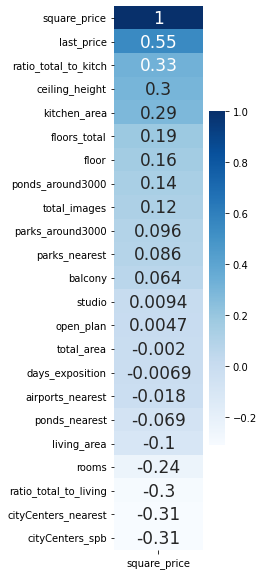

In [99]:
plt.figure(figsize=(2,10))
sns.heatmap(spb_flats.corr(method='pearson')[['square_price']].sort_values(by='square_price', ascending=False), cmap="Blues", 
            annot=True, annot_kws={'size':17})

#Общий вывод <a id="Общий вывод"></a>



- Цена за квадратный метр - Чем выше цена за квадратный метр, тем выше цена при прочих равных условиях. 
- Комнаты - Особой зависимости нет, только на промежутке от 1 до 6 показывает обратную зависимость в центре.
- Этаж - цены падают на первых этажах, растут на последних и максимальны на этажах между первы и последним.
- Площадь - Чем больше площадь квартиры, тем выше цена.
- Время размещения объявления - небольшая зависимость на годовых интервалах, косвенное влияние других факторов, в центре улияние усиливается.
- Расстояние до центра - цена от 0 до 8 километров в самом центре колеблется, издалека и до 8 км центра неуклонно растёт


Так же были найдены странные всплески активности в данных о времени отключения объявлений после 50 дней со дня подачи. На основе данных были составленны и не опровергнуты две гиппотезы о показателе самой быстрой продажи (от 0 до 43 дней) и самой медленной (от 193 и до бесконечности).


Побороли аномалии где смогли, в основном это были живые данные, которые были исключением но тем не менее портили стату, поэтому были использованы при составлении гистограмм и функций - срезы и сводные таблицы.








